## Importing necessary libraries

In [2]:
import pandas as pd                                                    # For importing dataset and operations on dataset                     
import numpy as np                                                     # For using arrays
import matplotlib.pyplot as plt                                        # For data visualization
import seaborn as sns                                                  # For data visualization
from sklearn.preprocessing import MinMaxScaler                         # For data normalization
from sklearn.model_selection import train_test_split                   # For splitting data into training and testing sets
from sklearn.model_selection import GridSearchCV                       # For hyperparameter tuning of ML models
from sklearn.linear_model import LogisticRegression                    # ML algorithm
from sklearn.ensemble import RandomForestClassifier                    # ML algorithm
from sklearn.metrics import confusion_matrix                           # For viewing the confusion matrix
from sklearn.metrics import accuracy_score                             # For viewing the accuracy of model
from sklearn.metrics import classification_report                      # For viewing all metrics of the trained model

In [3]:
dataset = pd.read_csv('winequality-red.csv')                           # Importing dataset
dataset.head(10)                                                       # Displaying few initial records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
print(dataset.isna().sum())                                            # Checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
print(dataset['quality'].unique())                                     # Viewing all distinct output classes

[5 6 7 4 8 3]


## Data Analysis and Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

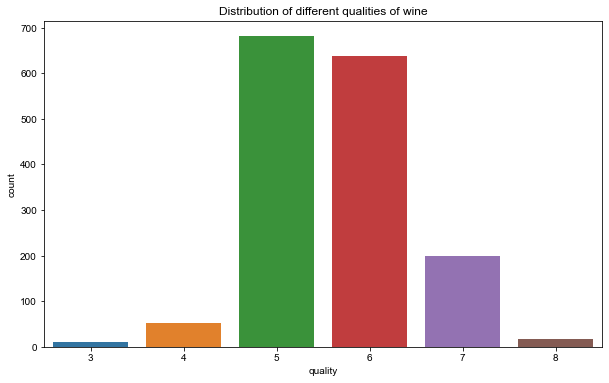

In [6]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of different qualities of wine')
sns.countplot(dataset['quality'])                                      # Plotting graph for distribution of output classes
sns.set()
dataset['quality'].value_counts()

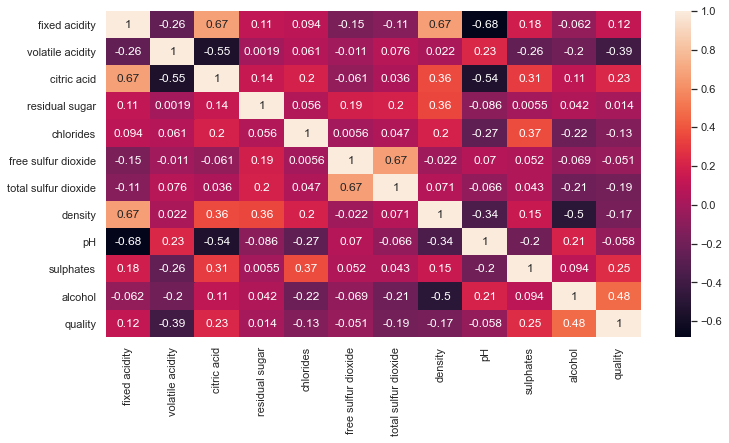

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(), annot=True)                                # For determining correlation among variables
sns.set()

In [8]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid',       # Obtaining input variables from dataset
             'chlorides', 'total sulfur dioxide', 'density', 'sulphates',
             'alcohol']]                                      
y = dataset.iloc[:, -1].values                                         # Obtaining output variable from dataset

In [9]:
# Splitting dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Scaling the data

In [10]:
sc_x = MinMaxScaler()                                                  # Normalizing the input variables
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test) 

print(X_train)

[[0.46428571 0.34931507 0.24       ... 0.53817915 0.14371257 0.140625  ]
 [0.19642857 0.34931507 0.01       ... 0.37812041 0.11976048 0.359375  ]
 [0.32142857 0.09589041 0.42       ... 0.53817915 0.28143713 0.140625  ]
 ...
 [0.39285714 0.26027397 0.3        ... 0.56314244 0.22754491 0.3125    ]
 [0.35714286 0.49315068 0.         ... 0.39133627 0.13173653 0.1875    ]
 [0.26785714 0.37671233 0.23       ... 0.45007342 0.08982036 0.15625   ]]


## Applying suitable ML algorithm

### Logistic Regression

In [11]:
classifier1 = LogisticRegression()                                      # Applying Logistic Regression algorithm
classifier1.fit(X_train, y_train)                                       # Fitting the data into the model

LogisticRegression()

In [19]:
y_pred = classifier1.predict(X_test)                                    # Obtaining predictions from trained model on test data 

#### Obtaining results

In [20]:
cm = confusion_matrix(y_test, y_pred)                                   # Observing Confusion matrix

print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[  0   0   4   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 160  50   1   0]
 [  0   0  64 118   4   0]
 [  0   0   3  51   5   0]
 [  0   0   0   4   2   0]]


In [21]:
print("Accuracy: ", accuracy_score(y_test, y_pred))                     # Determining accuracy of model

Accuracy:  0.5895833333333333


In [22]:
print(classification_report(y_test, y_pred))                            # Viewing performance of model on testing set

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.67      0.76      0.71       211
           6       0.52      0.63      0.57       186
           7       0.42      0.08      0.14        59
           8       0.00      0.00      0.00         6

    accuracy                           0.59       480
   macro avg       0.27      0.25      0.24       480
weighted avg       0.54      0.59      0.55       480



C:\Users\HP-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [16]:
classifier2 = RandomForestClassifier()                                                     # Applying Random Forest classifier
param_dict = {"n_estimators": [50, 100, 150, 200, 250]}
RFC_tuned = GridSearchCV(classifier2, param_grid=param_dict, scoring='accuracy', cv=5)     # Hyperparameter tuning
RFC_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

#### Obtaining results

In [17]:
RFC_tuned.best_score_                           # Mean cross-validated score of estimator which gave highest score

0.6961563100576554

In [18]:
pred_RFC = RFC_tuned.predict(X_test)
print(classification_report(y_test, pred_RFC))                    # Checking performance of model on test data              
print("The RF model accuracy on test data is", accuracy_score(y_test, pred_RFC))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        14
           5       0.72      0.81      0.76       211
           6       0.61      0.70      0.66       186
           7       0.75      0.36      0.48        59
           8       1.00      0.17      0.29         6

    accuracy                           0.67       480
   macro avg       0.51      0.34      0.36       480
weighted avg       0.66      0.67      0.65       480

The RF model accuracy on test data is 0.6729166666666667


C:\Users\HP-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## "So, Random Forest Classifier performed better than Logistic Regression."